In [4]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
data_path = ['data']

In [6]:
filepath = os.sep.join(data_path+['X_Y_Sinusoid_Data.csv'])
df = pd.read_csv(filepath)

In [7]:
df.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [12]:
X_real = np.linspace(0,1.0,100)
Y_real = np.sin(2 * np.pi * X_real)

[Text(0.5, 0, 'data'), Text(0, 0.5, 'y data')]

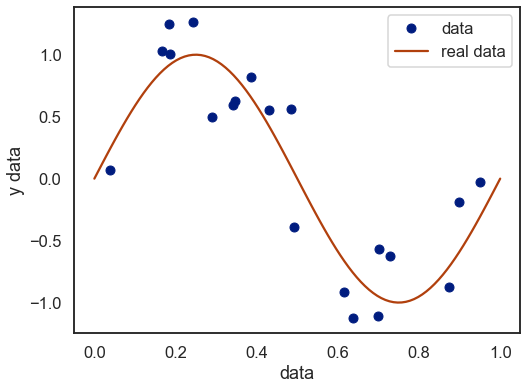

In [19]:
sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

ax = df.plot('x','y',ls='',marker='o',label='data',figsize=(8,6))
ax.plot(X_real,Y_real,ls='-',marker='',label='real data')

ax.legend()
ax.set(xlabel='data',ylabel='y data')

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

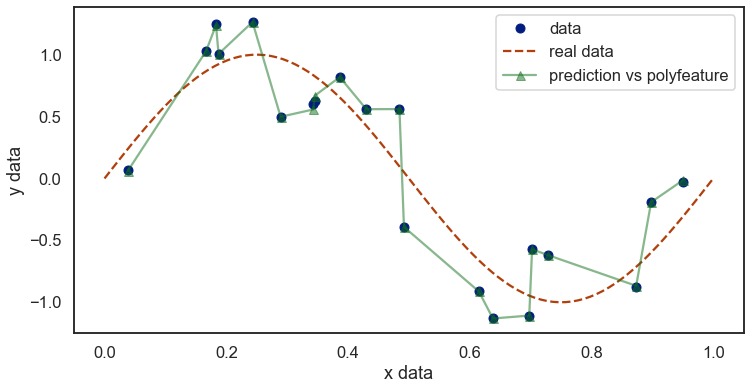

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

X_data = df[['x']]
Y_data = df['y']

X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly,Y_data)
Y_pred = lr.predict(X_poly)

plt.figure(figsize=(12,6))
plt.plot(X_data,Y_data,ls='',marker='o',label='data',alpha=1)
plt.plot(X_real,Y_real,ls='--',marker='',label='real data')
plt.plot(X_data,Y_pred,ls='-',marker='^',label='prediction vs polyfeature',alpha=.5)
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data',ylabel='y data')

In [23]:
import warnings
warnings.filterwarnings('ignore',module='sklearn')

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

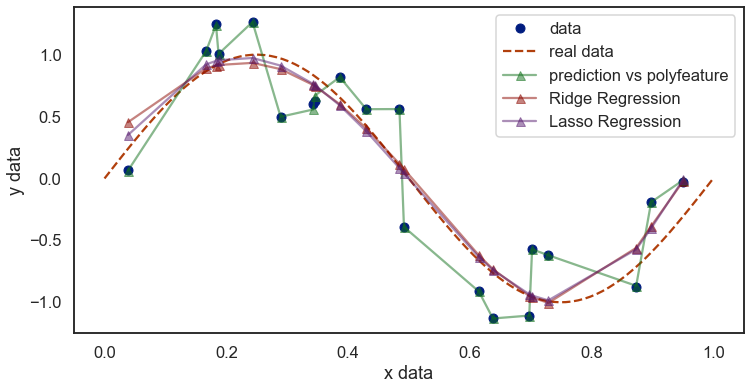

In [28]:
from sklearn.linear_model import Ridge, Lasso

rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly,Y_data)
Y_pred_rr = rr.predict(X_poly)

ls = Lasso(alpha=0.0001)
ls = ls.fit(X_poly,Y_data)
Y_pred_ls = ls.predict(X_poly)

plt.figure(figsize=(12,6))
plt.plot(X_data,Y_data,ls='',marker='o',label='data',alpha=1)
plt.plot(X_real,Y_real,ls='--',marker='',label='real data')
plt.plot(X_data,Y_pred,marker='^',label='prediction vs polyfeature',alpha=.5)
plt.plot(X_data,Y_pred_rr,marker='^',label='Ridge Regression',alpha=.5)
plt.plot(X_data,Y_pred_ls,marker='^',label='Lasso Regression',alpha=.5)

plt.legend()
ax = plt.gca()
ax.set(xlabel='x data',ylabel = 'y data')

In [30]:
coefficient = pd.DataFrame()
coefficient['linear regression'] = lr.coef_
coefficient['Ridge regression'] = rr.coef_
coefficient['Lasso Regression'] = ls.coef_

coefficient = coefficient.applymap(abs)
coefficient.describe()

,linear regression,Ridge regression,Lasso Regression
count,2.100000e+01,21.000000,21.000000
mean,5.783911e+13,2.169397,2.167284
std,6.038244e+13,2.900278,4.706731
min,1.622914e+07,0.000000,0.000000
25%,3.421984e+12,0.467578,0.000000
50%,3.623240e+13,1.017272,0.252181
75%,1.071032e+14,2.883507,1.641353
max,1.655707e+14,12.429635,20.176708


In [31]:
(coefficient>0).sum()

linear regression    21
Ridge regression     20
Lasso Regression     15
dtype: int64

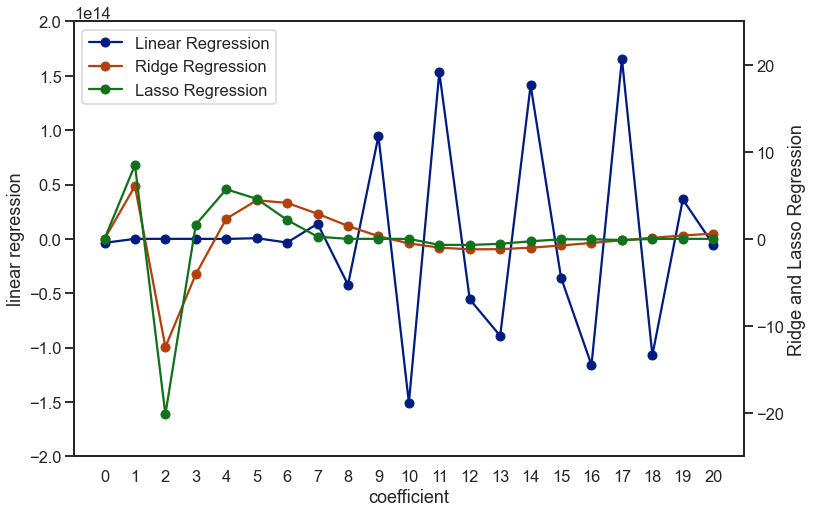

In [37]:
colors = sns.color_palette()

plt.figure(figsize=(12,8))

ax1 = plt.axes()
ax2 = ax1.twinx()

ax1.plot(lr.coef_.ravel(),color=colors[0],marker='o',label='Linear Regression')
ax2.plot(rr.coef_.ravel(),color=colors[1],marker='o',label='Ridge Regression')
ax2.plot(ls.coef_.ravel(),color=colors[2],marker='o',label='Lasso Regression')

ax1.set_ylim(-2e14,2e14)
ax2.set_ylim(-25,25)

h1 , l1 = ax1.get_legend_handles_labels()
h2 , l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2,l1+l2)

ax1.set(xlabel = 'coefficient' , ylabel='linear regression')
ax2.set(ylabel = 'Ridge and Lasso Regression')

ax1.set_xticks(range(len(lr.coef_)));

In [42]:
data_path = ['E:\Machine Learning Course\Course2\week2']

In [74]:
filepath = os.sep.join(data_path+['Ames_housing_sales.csv'])
df = pd.read_csv(filepath)

In [75]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [76]:
df.shape[1]

80

In [77]:
df = pd.get_dummies(df,drop_first=True)

In [78]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=252)

In [79]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.3,random_state=42)

In [80]:
mask = df.apply(lambda x: x.nunique())>2
num_cols = df.columns[mask]

In [81]:
skew_limit = 0.75

skew_vals = train[num_cols].skew()

skew_cols = (skew_vals[skew_vals>skew_limit].sort_values(ascending=False).to_frame().rename(columns={0:'skew'}))
skew_cols

,skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
KitchenAbvGr,5.497813
ScreenPorch,4.599803
BsmtFinSF2,4.466378
BsmtHalfBath,3.882163
EnclosedPorch,3.218303


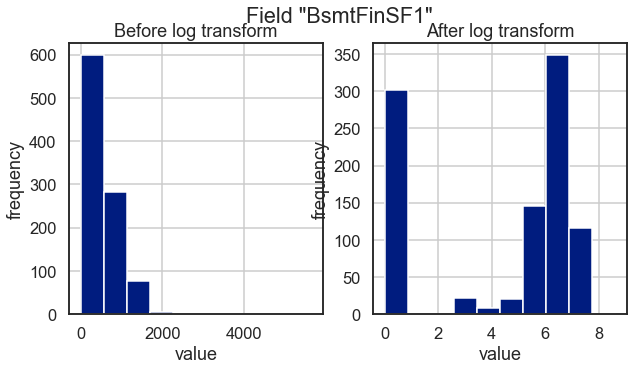

In [82]:
field = 'BsmtFinSF1'
fig, (ax_before,ax_after) = plt.subplots(1,2,figsize=(10,5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='Before log transform',ylabel='frequency',xlabel='value')
ax_after.set(title='After log transform',ylabel='frequency',xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [83]:
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == 'SalePrice':
        continue
    train[col] = np.log1p(train[col])
    test[col] = test[col].apply(np.log1p)

In [84]:
feature = [x for x in train.columns if x!='SalePrice']

X_train = train[feature]
y_train = train['SalePrice']

X_test = test[feature]
y_test = test['SalePrice']

In [85]:
from sklearn.metrics import mean_squared_error

def rmse(ytrue,ypred):
    return np.sqrt(mean_squared_error(ytrue,ypred))

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train,y_train)
pred = lr.predict(X_test)
linear_rmse = rmse(y_test,pred)
print(linear_rmse)

78634.28580632074


[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predict Price'),
 (0.0, 582933.0),
 (0.0, 582933.0),
 Text(0.5, 1.0, 'Linear Regression Result')]

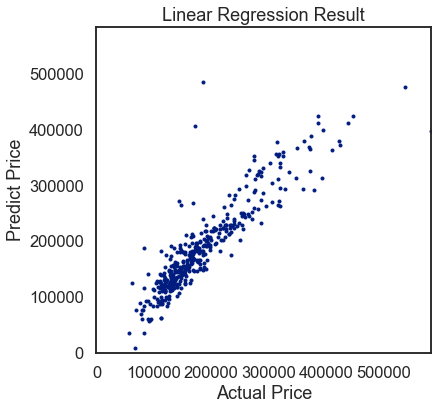

In [87]:
f = plt.figure(figsize=(6,6))

ax = plt.axes()
ax.plot(y_test,pred,marker='o',ls='',ms=3.0)

lim = (0,y_test.max())
ax.set(xlabel='Actual Price',ylabel='Predict Price',xlim=lim,ylim=lim,title='Linear Regression Result')

In [90]:
from sklearn.linear_model import RidgeCV

alphas = [0.005,0.05,0.1,0.3,1,3,5,10,15,30,80]

RidgeCV = RidgeCV(alphas=alphas,cv=4).fit(X_train,y_train)

ridgecv_rmse = rmse(y_test,RidgeCV.predict(X_test))
print(RidgeCV.alpha_,ridgecv_rmse)

10.0 32205.82515133085


In [91]:
from sklearn.linear_model import LassoCV

alphas2 = [0.005,0.05,0.01,1,5,20,50,80,100,120,140]

LassoCV = LassoCV(alphas = alphas2, max_iter=5e4, cv=4).fit(X_train,y_train)
lassoCV_rmse = rmse(y_test,LassoCV.predict(X_test))
print(LassoCV.alpha_,lassoCV_rmse)

120.0 37010.76179639448


In [93]:
print('of {} coefficient, {} are non-zero with lasso'.format(len(LassoCV.coef_),len(LassoCV.coef_.nonzero()[0])))

of 251 coefficient, 102 are non-zero with lasso


In [95]:
from sklearn.linear_model import ElasticNetCV

l_ratio = np.linspace(0.1,0.9,9)

elasticnetCV = ElasticNetCV(alphas=alphas,l1_ratio=l_ratio,max_iter=1e4).fit(X_train,y_train)
elasticnetCV_rmse = rmse(y_test,elasticnetCV.predict(X_test))
print(elasticnetCV.alpha_,elasticnetCV_rmse)

0.1 32213.839417433952


In [98]:
rmse_val = [linear_rmse,ridgecv_rmse,lassoCV_rmse,elasticnetCV_rmse]
label = ['linear','ridge','lasso','elasticnet']

rmse_df = pd.Series(rmse_val,index=label).to_frame()
rmse_df.rename(columns={0:'RMSE'},inplace=1)

In [99]:
rmse_df

,RMSE
linear,78634.285806
ridge,32205.825151
lasso,37010.761796
elasticnet,32213.839417


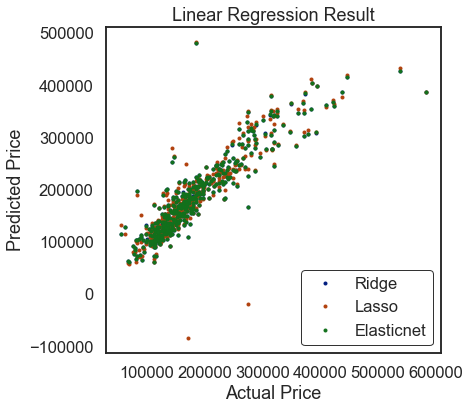

In [100]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

models = [RidgeCV,LassoCV,elasticnetCV]
labels = ['Ridge','Lasso','Elasticnet']

for mod, lab in zip(models,labels):
    ax.plot(y_test,mod.predict(X_test),marker='o',ls='',ms=3.0,label=lab)
    
leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price',ylabel='Predicted Price',title='Linear Regression Result');